In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

In [ ]:
path = 'https://raw.githubusercontent.com/iwanlaudin0101/teks-klasifikasi-menggunakan-model-lstm/master/Dataset/indosum%20datasets.txt'
df = pd.read_csv(path, delimiter='\t', header=None)
df.columns = ['kategori','sumber','berita']
df = df[(df['kategori'] != 'showbiz')]
df.head()

,kategori,sumber,berita
0,teknologi,kumparan,Uber pada hari Jumat mengatakan akan menguak d...
1,teknologi,dailysocial.id,"Menyusul jejak NES Classic Edition , SNES Clas..."
2,teknologi,dailysocial.id,"MDI Ventures , perusahaan modal ventura yang d..."
3,teknologi,kumparan,Mazda masih menutup rapat informasi soal sport...
4,teknologi,dailysocial.id,"Sampai di akhir tahun 2017 ini , frasa “ print..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   kategori  8000 non-null   object
 1   sumber    8000 non-null   object
 2   berita    8000 non-null   object
dtypes: object(3)
memory usage: 250.0+ KB


In [ ]:
df = df[(df['kategori'] != 'tajuk utama')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   kategori  6000 non-null   object
 1   sumber    6000 non-null   object
 2   berita    6000 non-null   object
dtypes: object(3)
memory usage: 187.5+ KB


In [ ]:
df.drop('sumber', axis=1, inplace=True)

<ipython-input-7-323f32266d05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('sumber', axis=1, inplace=True)


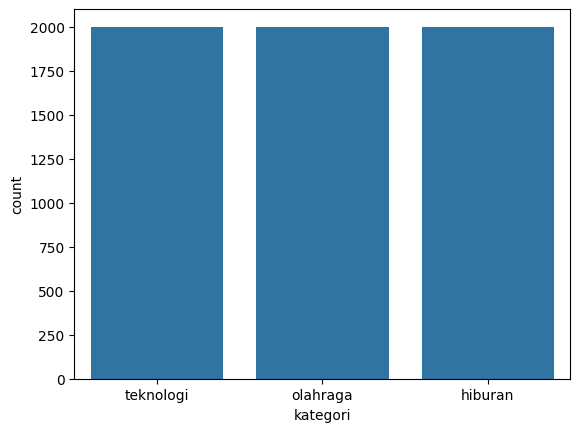

In [ ]:
sns.countplot(x=df['kategori'])
plt.show()

#**Preprocessing**

In [ ]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
import re, nltk
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
Sastrawi_StopWords_id = factory.get_stop_words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def olah_text(text):
    text = text.lower()
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenisasi kata dan menghilangkan stop words dari teks berita
    tokens = word_tokenize(text)
    filtered_words = [w for w in tokens if w not in Sastrawi_StopWords_id]
    # lemmetisasi kata
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [ ]:
df['Hasil'] = df['berita'].apply(olah_text)

##**Hasil Preprocessing**

In [ ]:
df.head()

,kategori,berita,Hasil
0,teknologi,Uber pada hari Jumat mengatakan akan menguak d...,uber jumat menguak data perjalanan paris publi...
1,teknologi,"Menyusul jejak NES Classic Edition , SNES Clas...",menyusul jejak ne classic edition snes classic...
2,teknologi,"MDI Ventures , perusahaan modal ventura yang d...",mdi venture perusahaan modal ventura didukung ...
3,teknologi,Mazda masih menutup rapat informasi soal sport...,mazda menutup rapat informasi sportscar anyar ...
4,teknologi,"Sampai di akhir tahun 2017 ini , frasa “ print...",tahun frasa printer mencetak video terdengar m...


#**Pembobotan Term Frequency-Inverse Document Frequency (TF-IDF)**

In [ ]:
x = df['Hasil']
y = df['kategori']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

TfidfVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

54091


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam dataset awal
print(tf_idf.get_feature_names_out())

['aa' 'aaa' 'aaahhhh' ... 'šimi' 'μm' '한가']


Hasil Setelah diberi Bobot Nilai dan diubah ke bentuk matriks

In [ ]:
X_tf_idf = tf_idf.transform(x).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#**Seleksi Fitur**


In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 5000 dengan highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=10000)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduksi features
print('Angka Original Feature :', X.shape[1])
print('Angka Reduksi Feature :', X_kbest_features.shape[1])

Angka Original Feature : 54091
Angka Reduksi Feature : 10000


In [ ]:
from sklearn.model_selection import train_test_split

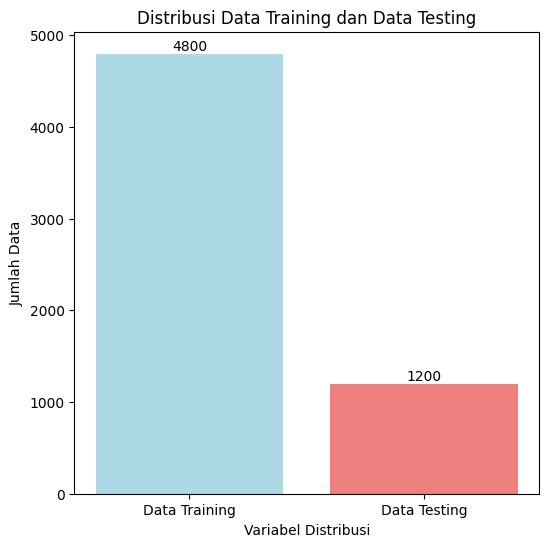

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=42)
# Mendefinisikan label untuk plot
labels = ['Data Training', 'Data Testing']
sizes = [len(y_train), len(y_test)]
colors = ['lightblue', 'lightcoral']

# Buat plot
plt.figure(figsize=(6,6))
bars = plt.bar(labels, sizes, color=colors)

# Menambahkan label angka di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title('Distribusi Data Training dan Data Testing')
plt.xlabel('Variabel Distribusi')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [ ]:
model = MultinomialNB()
# Melakukan validasi silang sebelum hyperparameter tuning
CV = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=CV)

# Menampilkan hasil
print("Cross-Validation Sebelum Hyperparameter Tuning")
print('\t5-Fold Validation Scores:', [f"{score*100:.2f}%" for score in scores])
print(f'\tCross Validation Training Accuracy: {np.mean(scores)*100:.3f}% ({np.std(scores)*100:.3f}%)')


Cross-Validation Sebelum Hyperparameter Tuning
	5-Fold Validation Scores: ['97.40%', '97.40%', '97.29%', '97.92%', '97.81%']
	Cross Validation Training Accuracy: 97.562% (0.252%)


In [ ]:
# Definisikan hyperparameter yang akan dicari
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

In [ ]:
# Inisialisasi model
model = MultinomialNB()

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melatih GridSearchCV
grid_search.fit(X_train, y_train)

# Mendapatkan hyperparameter terbaik
best_params = grid_search.best_params_
print(f"Hyperparameter terbaik: {best_params}")

# Melatih ulang model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_

# Cross-validation setelah hyperparameter tuning
scores = cross_val_score(best_model, X_train, y_train, cv=CV)

# Menampilkan hasil
print("Cross-Validation Sesudah Hyperparameter Tuning")
print('\t5-Fold Validation Scores:', [f"{score*100:.2f}%" for score in scores])
print(f'\tCross Validation Training Accuracy: {np.mean(scores)*100:.3f}% ({np.std(scores)*100:.3f}%)')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyperparameter terbaik: {'alpha': 0.01, 'fit_prior': True}
Cross-Validation Sesudah Hyperparameter Tuning
	5-Fold Validation Scores: ['97.92%', '97.71%', '97.40%', '98.12%', '98.02%']
	Cross Validation Training Accuracy: 97.833% (0.259%)


Confusion Matrix:
 [[374   3   6]
 [  4 375   1]
 [ 21   0 416]]
Accuracy:  0.9708333333333333
Precision:  0.9708333333333333
Recall Score:  0.9708333333333333
F1 Score:  0.9708333333333333


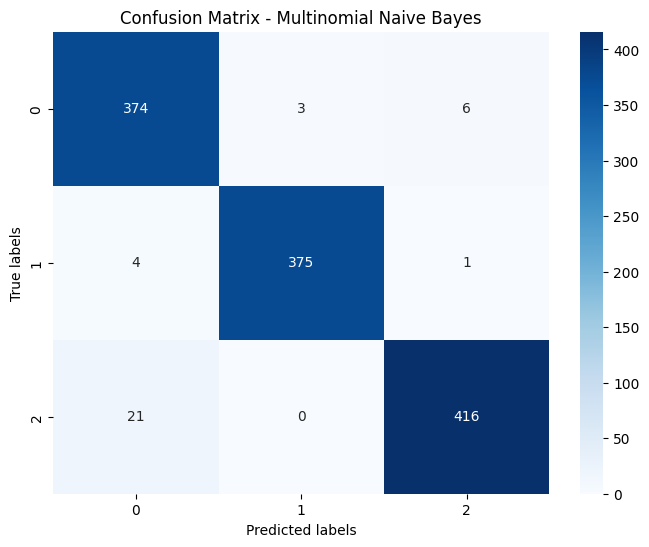

In [ ]:
# Melakukan prediksi
y_pred = best_model.predict(X_test)

# Menghitung dan menampilkan metrik evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='micro'))
print('Recall Score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='micro'))

# Membuat confusion matrix dengan warna
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import classification_report

# Mendapatkan daftar kategori unik dalam data
unique_categories = np.unique(y)

# Membuat dictionary untuk menyimpan metrik evaluasi untuk setiap kategori
metrics_per_category = {}

# Menghitung dan menyimpan metrik evaluasi untuk setiap kategori
for category in unique_categories:
    # Mendapatkan data yang hanya termasuk dalam kategori tertentu
    y_test_category = y_test[y_test == category]
    predicted_category = y_pred[y_test == category]

    # Menghitung metrik evaluasi untuk kategori tersebut
    acc = accuracy_score(y_test_category, predicted_category)
    prec = precision_score(y_test_category, predicted_category, average='micro')
    rec = recall_score(y_test_category, predicted_category, average='micro')
    f1 = f1_score(y_test_category, predicted_category, average='micro')
    report = classification_report(y_test_category, predicted_category, output_dict=True)
    support = report['weighted avg']['support']

    # Menyimpan metrik evaluasi untuk kategori tersebut
    metrics_per_category[category] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1, 'Support': support}

# Mengonversi dictionary ke dalam DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_per_category, orient='index')

# Menambahkan baris untuk nilai rata-rata atau total
metrics_df.loc['Avg/Total'] = metrics_df.mean()

# Fungsi untuk mengubah desimal menjadi persentase
def format_percentage(x):
    return "{:.2%}".format(x)

# Mengonversi desimal menjadi persentase dalam DataFrame
metrics_df_percent = metrics_df.applymap(format_percentage)

# Menampilkan tabel matriks dengan nilai dalam format persentase
print(metrics_df_percent)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

          Accuracy Precision  Recall F1 Score    Support
hiburan     97.65%    97.65%  97.65%   97.65%  38300.00%
olahraga    98.68%    98.68%  98.68%   98.68%  38000.00%
teknologi   95.19%    95.19%  95.19%   95.19%  43700.00%
Avg/Total   97.18%    97.18%  97.18%   97.18%  40000.00%
